<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据读取&amp;基本情况查看" data-toc-modified-id="数据读取&amp;基本情况查看-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据读取&amp;基本情况查看</a></span></li><li><span><a href="#数据预处理" data-toc-modified-id="数据预处理-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据预处理</a></span><ul class="toc-item"><li><span><a href="#异常值检测&amp;处理" data-toc-modified-id="异常值检测&amp;处理-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>异常值检测&amp;处理</a></span></li><li><span><a href="#特征衍生" data-toc-modified-id="特征衍生-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>特征衍生</a></span></li><li><span><a href="#缺失值检测&amp;处理" data-toc-modified-id="缺失值检测&amp;处理-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>缺失值检测&amp;处理</a></span><ul class="toc-item"><li><span><a href="#缺失过多特征删除" data-toc-modified-id="缺失过多特征删除-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>缺失过多特征删除</a></span></li><li><span><a href="#直接填充默认缺失值" data-toc-modified-id="直接填充默认缺失值-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>直接填充默认缺失值</a></span></li></ul></li></ul></li><li><span><a href="#特征筛选" data-toc-modified-id="特征筛选-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>特征筛选</a></span><ul class="toc-item"><li><span><a href="#psi筛选" data-toc-modified-id="psi筛选-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>psi筛选</a></span></li><li><span><a href="#随机森林筛选特征" data-toc-modified-id="随机森林筛选特征-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>随机森林筛选特征</a></span></li><li><span><a href="#iv筛选" data-toc-modified-id="iv筛选-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>iv筛选</a></span></li><li><span><a href="#人工去除偏事后特征" data-toc-modified-id="人工去除偏事后特征-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>人工去除偏事后特征</a></span></li><li><span><a href="#相关性筛选，多重共线性筛选" data-toc-modified-id="相关性筛选，多重共线性筛选-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>相关性筛选，多重共线性筛选</a></span></li><li><span><a href="#分箱调整" data-toc-modified-id="分箱调整-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>分箱调整</a></span></li><li><span><a href="#woe编码后相关性筛选" data-toc-modified-id="woe编码后相关性筛选-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>woe编码后相关性筛选</a></span></li><li><span><a href="#剔除系数和其他系数符号不一致的特征" data-toc-modified-id="剔除系数和其他系数符号不一致的特征-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>剔除系数和其他系数符号不一致的特征</a></span></li></ul></li><li><span><a href="#模型训练和评价" data-toc-modified-id="模型训练和评价-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>模型训练和评价</a></span></li><li><span><a href="#分数映射&amp;分数分布" data-toc-modified-id="分数映射&amp;分数分布-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>分数映射&amp;分数分布</a></span><ul class="toc-item"><li><span><a href="#分数刻度&amp;各入模变量相应分箱得分" data-toc-modified-id="分数刻度&amp;各入模变量相应分箱得分-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>分数刻度&amp;各入模变量相应分箱得分</a></span></li><li><span><a href="#训练集&amp;验证集&amp;时间外样本分数转换" data-toc-modified-id="训练集&amp;验证集&amp;时间外样本分数转换-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>训练集&amp;验证集&amp;时间外样本分数转换</a></span></li><li><span><a href="#训练集&amp;验证集&amp;时间外样本分数分箱分布" data-toc-modified-id="训练集&amp;验证集&amp;时间外样本分数分箱分布-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>训练集&amp;验证集&amp;时间外样本分数分箱分布</a></span></li></ul></li></ul></div>

# 评分卡建模模板

author:33

date:2020/3/23

In [1]:

#隐藏导出html和pdf里面的代码
#这个在你自己编辑notebook时不起作用，对导出结果中所有代码起作用：导出html或者pdf中是没有代码的
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
CSS = """#notebook div.output_subarea {max-width:100%;}""" #changes output_subarea width to 100% (from 100% - 14ex)
HTML('<style>{}</style>'.format(CSS))

In [2]:
#包加载
import sys
import os ##显示工作路径，修改工作路径的包
import numpy as np##是python数值计算基石，听过多种数据结构，算法以及设计计算所需的接口
import pandas as pd##提供了高级数据结构和函数，dataframe,series
import math 
import statsmodels.api as sm##统计分析包，方差分析，时间序列分析，非参数估计 import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier,_tree
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
#可视化
import matplotlib.pyplot as plt ##python里适用最广泛的 可视化库，与其他库良好整合
import seaborn as sns ##此包是基于matplotlib的可视化包
import itables.interactive#每一个表都是交互型的表
from itables import show
import itables.options as opt
opt.classes = ["display", "nowrap"]
opt.lengthMenu = [10, 10, 100, 200, 500, 1000, 2000, 5000]
opt.maxBytes = 200000
opt.maxColumns=100
opt.columnDefs=[{"width": "150px", "targets": "_all"}]

<IPython.core.display.Javascript object>

In [3]:
##导入自定义函数
##当自定义函数和当前默认工作路径不一致时
sys.path.append('/Users/heshan/python学习/学习项目/self_function') #自定义函数对应的路径
import self_f_2  #加载自定义的函数py文件
# sys.path
warnings.filterwarnings('ignore')

##当自定义函数和当前默认工作路径一致时
# import FileWriteAbout  # 导入另一个文件
# FileWriteAbout.writeList()  #调用其中的函数名

# os.getcwd()
# print(os.getcwd())#显示当前路径
#os.chdir('')#更改路径，''里面为更改的路径

## 数据读取&基本情况查看

In [4]:
#数据读取
data=pd.read_excel("scorecard_model_sample.xlsx")
print(data.info())
# show(data.head(),columnDefs=[{"width": "300px", "targets": "_all"}])
print("\033[1;31m连续型变量分布\n \033[0m")
show(data.describe(),columnDefs=[{"width": "200px","high": "80px", "targets": "_all"}])
print("\033[1;31m离散型变量分布\n \033[0m")
show(data.describe(include=['object']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 43 columns):
id        5456 non-null int64
date      5456 non-null datetime64[ns]
v1        4324 non-null float64
v2        5456 non-null object
v3        4255 non-null float64
v4        5293 non-null float64
v5        5440 non-null float64
v6        3454 non-null float64
v7        2467 non-null float64
v8        5456 non-null int64
v9        5456 non-null object
v10       5456 non-null object
v11       5098 non-null float64
v12       4967 non-null float64
v13       5213 non-null float64
v14       5004 non-null float64
v15       5070 non-null float64
v16       2054 non-null float64
v17       2054 non-null object
v18       5176 non-null float64
v19       5021 non-null float64
v20       5155 non-null float64
v21       5081 non-null float64
v22       5205 non-null float64
v23       5207 non-null float64
v24       5034 non-null float64
v25       5450 non-null float64
v26       5456 non-null int64


,id,v1,v3,v4,v5,v6,v7,v8,v11,v12,v13,v14,v15,v16,v18,v19,v20,v21,v22,v23,v24,v25,v26,v28,v29,v30,v31,v32,v33,v34,v36,v37,v38,v40,v41,target


离散型变量分布
 


,v2,v9,v10,v17,v35,v39


## 数据预处理

### 异常值检测&处理

针对异常变量可根据对数据对理解进行极端值分数映射转换或者删除极端值对应对样本

In [5]:
#1.数据预处理

#1.1异常值
    #1.1.1异常值检测

character_feature,count=self_f_2.character_VarFindFunc(data)
data_num=data.drop(character_feature,axis=1)
print("\033[1;31m离散型变量个数\n \033[0m",count)
print("\033[1;31m连续型变量个数\n \033[0m",len(data.columns)-count)

data_abnormal=data.copy()

data_abnormal=self_f_2.find_abnormal(data_abnormal)

# data_abnormal.head()
# data_abnormal.describe()
data_abnormal.describe(include=['object'])#查看离散型特征情况

#针对异常变量可根据对数据对理解进行极端值分数映射转换或者删除极端值对应对样本

离散型变量个数
  6
连续型变量个数
  37


,v2,v9,v10,v17,v35,v39,date_abnormal,v1_abnormal


### 特征衍生
这里主要是做特征各种交叉衍生的工作

### 缺失值检测&处理

In [6]:
#1.2.1缺失值统计
feature_na,na_feature_num=self_f_2.findNaFunc(data)

# feature_na=feature_na.rename(columns={"queshi_num":"缺失值数量","na_rate":"缺失率"})
print("\033[1;31m有缺失值的变量个数:\n \033[0m",na_feature_num)
print("\033[1;31m各变量缺失率展示\n \033[0m")
feature_na_show=feature_na.sort_values(by='queshi_num', axis=0, ascending=False)
feature_na_show=feature_na_show.reset_index(drop=False)
show(feature_na_show)

有缺失值的变量个数:
  34
各变量缺失率展示
 


index,var_name,queshi_num,na_rate,na_rate_new


#### 缺失过多特征删除

In [7]:
#缺失过多特征删除
delete_feature=feature_na[feature_na["na_rate"]>0.7].var_name #当不想删除缺失特征时，可提高na_rate阈值
data_delete=data.drop(delete_feature,axis=1)

print("\033[1;31m删除的缺失值过高的特征:\n \033[0m",delete_feature)

删除的缺失值过高的特征:
  0    v35
1    v39
2    v36
3    v37
Name: var_name, dtype: object


#### 直接填充默认缺失值

另外的缺失值填充方法
- 根据相关性填充
- 根据后续结果看是否缺失值要根据特征中位数或者均值来填补

In [8]:
#直接填充默认缺失值，连续型特征填充-999，离散型特征填充“缺失”字样
data_fillna=self_f_2.na_fill(data_delete)
print("\033[1;31m缺失值填充后变量分布\n \033[0m")
show(data_fillna.describe())
show(data_fillna.describe(include=['object']))

#另外的缺失值填充方法
#根据相关性填充
#根据后续结果看是否缺失值要根据特征中位数或者均值来填补

缺失值填充后变量分布
 


,id,v1,v3,v4,v5,v6,v7,v8,v11,v12,v13,v14,v15,v16,v18,v19,v20,v21,v22,v23,v24,v25,v26,v28,v29,v30,v31,v32,v33,v34,v38,v40,v41,target


,v2,v9,v10,v17


## 特征筛选

In [9]:
#训练集，时间外验证集拆分
data_fillna=data_fillna[data_fillna['target'] !=2]
train_data=data_fillna[data_fillna['date']<='2019-03-01']
oot_data=data_fillna[data_fillna['date']>'2019-03-01']

print("\033[1;31m训练集好坏用户，1表示坏用户：\n \033[0m",train_data.target.value_counts())
print("\033[1;31m时间外验证集好坏用户，1表示坏用户：\n\033[0m",oot_data.target.value_counts())


#不作为自特征的特征
target="target" #目标特征对应的字段名称
target_series=pd.Series("target")
not_model_feature=["id","date"] #无需进行特征筛选的特征，这些特征放进去筛选会导致特征筛选时间过长


train_data=train_data.drop(not_model_feature,axis=1)
oot_data=oot_data.drop(not_model_feature,axis=1)

训练集好坏用户，1表示坏用户：
  0    2480
1    1167
Name: target, dtype: int64
时间外验证集好坏用户，1表示坏用户：
 0    1016
1     237
Name: target, dtype: int64


### psi筛选

In [10]:
#2.特征筛选
# 2.1psi筛选
# all_col = [x for x in train_data.columns if x not in not_model_feature_and_target]
all_col = [x for x in train_data.columns if x!=target]
psi_tup = []
for col in all_col:
    psi,psi_bin_df = self_f_2.cal_psi(train_data,oot_data,col)
    psi_tup.append((col,psi))
psi_delete = [x for x,y in psi_tup if y>=0.25]#这里psi阈值定位0.25

#变量和psi转换成数据框
psi_df=pd.DataFrame(pd.Series(dict(psi_tup)),columns=["value"])
psi_df=psi_df.reset_index().rename(columns={'index':'var_name'})
psi_df=psi_df.sort_values(by='value', axis=0, ascending=False)

train = train_data.drop(psi_delete,axis=1)

print('\033[1;31mpsi筛选删除的特征: \033[0m',psi_delete)
print('\033[1;31mpsi筛选的特征: \033[0m',train.columns)
print('\033[1;31m各变量psi: \033[0m')
show(psi_df)
print('\033[1;31mpsi筛选特征完成--------------------------------\033[0m')

psi筛选删除的特征:  ['v17']
psi筛选的特征:  Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v16', 'v18', 'v19', 'v20', 'v21', 'v22',
       'v23', 'v24', 'v25', 'v26', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33',
       'v34', 'v38', 'v40', 'v41', 'target'],
      dtype='object')
各变量psi: 


,var_name,value


psi筛选特征完成--------------------------------


### 随机森林筛选特征

In [11]:
#2.2随机森林筛选特征
#由于树模型不能处理非数值型特征，对离散型特征进行labelencoder编码，即将离散型特征使用连续数字来编码，
#没有啥业务含义，只是一个将离散型特征映射为数字而已

#data_label_encode=self_f_2.feature_labelencoder(train.drop(not_model_feature,axis=1))

data_label_encode=self_f_2.feature_labelencoder(train) 

#将重要性大于一定阈值的特征筛选出来          
df_random_var,importance_list_delete=self_f_2.Random_feature_filter(data_label_encode,im_value=0.001)
random_var_name=df_random_var['var_name']#重要度大于阈值到特征，不含目标特征

print("\033[1;31m随机森林删除的特征: \033[0m")

show(importance_list_delete)
print("\033[1;31m随机森林筛选的特征: \033[0m")
show(df_random_var)

random_var_name=random_var_name.append(target_series)#添加目标特征，即y特征
train=train[random_var_name]

随机森林删除的特征: 


,var_name,importance


随机森林筛选的特征: 


,var_name,importance


### iv筛选

In [12]:
#2.3iv筛选

# 特征分箱,默认用的是决策树分箱
train_col = [x for x in train.columns if x!=target]
bin_df_list=[]
cut_list=[]
for col in train_col:
    try:
        bin_df,cut = self_f_2.binning_var(train,col,target)
        bin_df_list.append(bin_df)
        cut_list.append(cut)
    except:
        pass
print('\033[1;31m特征分箱完成---------------------------\033[0m')

# print(bin_df_list[0])

bin_df_list_copy=bin_df_list.copy()
iv_df=self_f_2.iv_transform_df(bin_df_list_copy)
# print(bin_df_list[0])#为什么会改变呢

# print("\033[1;31m变量iv以及分箱表 \033[0m")
# show(iv_df,columnDefs=[{"width": "90px", "targets": "_all"}])
# iv_df.to_excel("iv_df.xlsx")

特征分箱完成---------------------------


In [13]:
# 保存每个特征的分割点list，此步骤需要在剔除
cut_dict={}
for dd,cc in zip(bin_df_list,cut_list):
    col = dd.index.name
#     print(col)
#     col = dd['var_name'].unique()
    cut_dict[col] = cc
    
# print(len(cut_dict))

# 剔除iv无限大的特征
bin_df_list = [x for x in bin_df_list if x.IV.iloc[0]!=float('inf')]
# print(bin_df_list)

# 将IV从大到小进行排序
iv_col = [x.index.name for x in bin_df_list]
iv_value = [x.IV.iloc[0] for x in bin_df_list]
iv_sort = sorted(zip(iv_col,iv_value),key=lambda x:x[1],reverse=True)


# iv筛选，筛选iv大于0.02的特征
iv_select_col = [x for x,y in iv_sort if y>=0.05]
iv_delete_col= [x for x,y in iv_sort if y<0.05]

print("\033[1;31miv筛选的特征:\033[0m",iv_select_col)
print("\033[1;31miv删除的特征:\033[0m",iv_delete_col)
print('\033[1;31miv筛选特征完成-----------------------------------\033[0m')

iv筛选的特征: ['v5', 'v12', 'v13', 'v23', 'v15', 'v22', 'v20', 'v19', 'v11', 'v16', 'v21', 'v25', 'v18', 'v4', 'v14', 'v9', 'v24', 'v10', 'v26', 'v30', 'v3', 'v1', 'v2', 'v32', 'v6']
iv删除的特征: ['v7', 'v28', 'v31', 'v8']
iv筛选特征完成-----------------------------------


### 人工去除偏事后特征

之所以在这个步骤去除，是因为一定程度上做过特征筛选，特征没有那么多了，可以更好地对每个特征进行解读；为什么放在相关性筛选之前做这个动作，是因为相关性筛选里面涉及到不同变量间关系而对变量进行删除，可能存在事后变量的存在而导致删除其余非事后变量这种现象，因此人工剔除偏事后特征在这一步做相对比较合适；

### 相关性筛选，多重共线性筛选

In [14]:
#2.5相关性筛选，多重共线性筛选
# 特征分类
cate_col = []
num_col = []
for col in iv_select_col:
    if train[col].dtype==np.dtype('object') or train[col].dtype==np.dtype('bool') or train[col].nunique()<=5:
        cate_col.append(col)
    else:
        num_col.append(col)

#相关性筛选，默认相关系数阈值0.7
corr=pd.DataFrame(train[num_col].corr())
print("\033[1;31m相关矩阵\033[0m")
show(corr,columnDefs=[{"width": "250px", "targets": "_all"}])

corr.to_excel("corr.xlsx")

#按照iv高低删除相关性高的变量
corr_select_col,corr_delete_col= self_f_2.forward_corr_delete(train,num_col,cut_value=0.7)

print("\033[1;31m相关性筛选的特征:\033[0m",corr_select_col)
print("\033[1;31m相关性筛选删除的特征:\033[0m",corr_delete_col)
print('\033[1;31m连续变量相关性筛选完成----------------------------- \033[0m')

#  # 多重共线性筛选，系数阈值10
vif_select_col,vif_delete_col = self_f_2.vif_delete(train,corr_select_col)


print("\033[1;31m多重共线性筛选的特征:\033[0m",vif_select_col)
print("\033[1;31m多重共线性删除的特征:\033[0m",vif_delete_col)
print('\033[1;31m连续变量多重共线性筛选完成------------------------- \033[0m')

相关矩阵


,v5,v12,v13,v23,v15,v22,v20,v19,v11,v16,v21,v25,v18,v4,v14,v24,v3,v1,v32,v6


相关性筛选的特征: ['v5', 'v12', 'v13', 'v16', 'v25', 'v4', 'v24', 'v3', 'v32']
相关性筛选删除的特征: ['v23', 'v15', 'v22', 'v20', 'v19', 'v11', 'v21', 'v18', 'v14', 'v1', 'v6']
连续变量相关性筛选完成----------------------------- 
多重共线性筛选的特征: ['v5', 'v12', 'v13', 'v16', 'v25', 'v4', 'v24', 'v3', 'v32']
多重共线性删除的特征: []
连续变量多重共线性筛选完成------------------------- 


### 分箱调整

In [15]:
# 自动调整单调分箱
nan_value=-999
trim_var_dict = {k:v for k,v in cut_dict.items() if k in vif_select_col}
trim_bin_list=[]
for col in trim_var_dict.keys():
    bin_cut = trim_var_dict[col]
    df_bin = [x for x in bin_df_list if x.index.name==col][0]
    if nan_value in bin_cut: # 当cut里有缺失映射值时，说明是把缺失单独分为一箱的，后续在进行调成单调分箱时
    # 不考虑缺失的箱，故将缺失映射值剔除
        woe_lst = df_bin['woe'].tolist()[1:]
    else:
        woe_lst = df_bin['woe'].tolist()   
#     print(col,woe_lst)
    if not self_f_2.judge_decreasing(woe_lst) and not self_f_2.judge_increasing(woe_lst): 
#         print(col)
        monot_cut = self_f_2.monot_trim(train, col, target, nan_value=nan_value, cut=bin_cut)
#         print(monot_cut)
        monot_bin_df = self_f_2.binning_trim(train, col, target, cut=monot_cut, right_border=True)
        trim_bin_list.append(monot_bin_df)
    else:
        trim_bin_list.append(df_bin)

        
# print(trim_bin_list)
# show(bin_df_list[2])
# show(trim_bin_list[0])
        
# adjust_iv_df=self_f_2.iv_transform_df(trim_bin_list)        
# show(adjust_iv_df)

#调整后的分箱再根据iv筛选一遍
select_num_df = []
for dd in trim_bin_list:
    if dd.IV.iloc[0]>=0.02 and dd.index.name in vif_select_col:
        select_num_df.append(dd)

print('\033[1;31m自动调整单调分箱完成-------------------- \033[0m')

自动调整单调分箱完成-------------------- 


In [16]:
# 连续型特征的woe映射集合表
woe_map_num = self_f_2.get_map_df(select_num_df)
woe_map_num['bin'] = woe_map_num['bin'].map(lambda x:str(x))
woe_map_num['min_bin'] = woe_map_num['bin'].map(lambda x:x.split(',')[0][1:])
woe_map_num.to_excel("woe_map_num.xlsx")
woe_map_num['max_bin'] = woe_map_num['bin'].map(lambda x:x.split(',')[1][:-1])
# show(woe_map_num)
woe_map_num['min_bin'] = woe_map_num['min_bin'].map(lambda x:float(x))
woe_map_num['max_bin'] = woe_map_num['max_bin'].map(lambda x:float(x))

print("\033[1;31m连续型变量分箱调整后分箱和woe情况 \033[0m")
show(woe_map_num)
# print(woe_map_num.columns)

连续型变量分箱调整后分箱和woe情况 


col,bin,IV,woe,total,totalrate,bad,badrate,good,goodrate,badattr,goodattr,bin_iv,bins,var_name,fuzhu,min_bin,max_bin


In [17]:
if len(cate_col)>0:
#     print(cate_col)
    bin_cate_list = [x for x in bin_df_list if x.index.name in cate_col]
    select_cate_df=bin_cate_list.copy()
    # 剔除woe不单调的离散形特征,正常离散型特征无需管woe是否单调，除非是有等级顺序的离散型特征
#     select_cate_df=[]
#     for i,dd in enumerate(bin_cate_list):
#         woe_lst = dd['woe'].tolist()
#         if self_f_2.judge_decreasing(woe_lst) or self_f_2.judge_increasing(woe_lst):
#             select_cate_df.append(dd)
    # 离散型特征的woe映射集合表
    if len(select_cate_df)>0:
        woe_map_cate = self_f_2.get_map_df(select_cate_df)
#         print(woe_map_cate)
        woe_map_cate['min_bin'] = list(woe_map_cate['bin'])
        woe_map_cate['max_bin'] = list(woe_map_cate['bin'])
        woe_map_df = pd.concat([woe_map_cate,woe_map_num],axis=0).reset_index(drop=True)
else:
    woe_map_df = woe_map_num.reset_index(drop=True)

print('\033[1;31miv筛选后的离散型变量 \033[0m',cate_col)
print("\033[1;31m连续和离散型变量分箱调整后分箱和woe情况 \033[0m")
show(woe_map_df)

iv筛选后的离散型变量  ['v9', 'v10', 'v26', 'v30', 'v2']
连续和离散型变量分箱调整后分箱和woe情况 


col,bin,IV,woe,total,totalrate,bad,badrate,good,goodrate,badattr,goodattr,bin_iv,bins,var_name,fuzhu,min_bin,max_bin


### woe编码后相关性筛选

In [18]:
# woe编码后相关性筛选

#对train使用woe编码替换
select_all_col = woe_map_df['col'].unique().tolist()
select_sort_col = [x for x,y in iv_sort if x in select_all_col]

train2 = train.loc[:,select_sort_col+[target]].reset_index(drop=True)

# woe映射
train_woe = self_f_2.var_mapping(train2,woe_map_df,'woe',target)
X = train_woe.loc[:,select_sort_col]
y = train_woe[target]
    
#相关性展示
corr=pd.DataFrame(train[num_col].corr())
corr_woe=pd.DataFrame(train_woe[select_sort_col].corr())
show(corr_woe, columnDefs=[{"width": "200px", "targets": "_all"}])

#相关性筛选，默认阈值0.7
corr_select_col_woe,corr_delete_col_woe = self_f_2.forward_corr_delete(train_woe,select_sort_col,cut_value=0.7)
print("\033[1;31m woe编码后相关性筛选的特征:\033[0m",corr_select_col_woe)
print("\033[1;31m woe编码后相关性删除的特征:\033[0m",corr_delete_col_woe)
print("\033[1;31m 相关性筛选完成-----------------------------\033[0m")

#多重共线性筛选，系数阈值10
vif_select_col_woe,vif_delete_col_woe  = self_f_2.vif_delete(train_woe,corr_select_col_woe)
print("\033[1;31m woe编码后多重共线性筛选的特征:\033[0m",vif_select_col_woe)
print("\033[1;31m woe编码后多重共线性删除的特征:\033[0m",vif_delete_col_woe)
print('\033[1;31m 多重共线性筛选完成--------------------------\033[0m')

#经过woe变换后的特征相关性和共线性筛选后的特征数据框
X1 = X.loc[:,vif_select_col_woe]

,v5,v12,v13,v16,v25,v4,v9,v24,v10,v26,v30,v3,v2,v32


 woe编码后相关性筛选的特征: ['v5', 'v13', 'v16', 'v25', 'v9', 'v24', 'v30', 'v2', 'v32']
 woe编码后相关性删除的特征: ['v12', 'v4', 'v10', 'v26', 'v3']
 相关性筛选完成-----------------------------
 woe编码后多重共线性筛选的特征: ['v5', 'v13', 'v16', 'v25', 'v9', 'v24', 'v30', 'v2', 'v32']
 woe编码后多重共线性删除的特征: []
 多重共线性筛选完成--------------------------


In [19]:
# 2.6 显著性筛选，前向逐步回归
pvalue_select_col,pvalue_delete_col = self_f_2.forward_pvalue_delete(X1,y)

print("\033[1;31m 显著性筛选的变量:\033[0m",pvalue_select_col)
print("\033[1;31m 显著性筛选删除的变量:\033[0m",pvalue_delete_col)
print('\033[1;31m 显著性筛选完成--------------------------\033[0m')


Optimization terminated successfully.
         Current function value: 0.511759
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 3647
Model:                          Logit   Df Residuals:                     3645
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Mar 2020   Pseudo R-squ.:                  0.1836
Time:                        18:23:48   Log-Likelihood:                -1866.4
converged:                       True   LL-Null:                       -2286.2
Covariance Type:            nonrobust   LLR p-value:                1.358e-184
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7538      0.041    -18.578      0.000      -0.833      -0.674
v5             1.0000      0.

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 3647
Model:                          Logit   Df Residuals:                     3638
Method:                           MLE   Df Model:                            8
Date:                Mon, 23 Mar 2020   Pseudo R-squ.:                  0.3514
Time:                        18:23:49   Log-Likelihood:                -1482.8
converged:                       True   LL-Null:                       -2286.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7438      0.047    -15.794      0.000      -0.836      -0.652
v5             0.7777      0.065     11.947      0.000       0.650       0.905
v13            0.2307      0.061      3.810      0.0

### 剔除系数和其他系数符号不一致的特征
**这里之所以没有说系数为正或者为负，是因为如果计算woe时为坏比好，那么逻辑回归系数就为正，如果计算woe时为好比坏，那么逻辑回归系数就为负**

In [20]:
# 剔除系数为负数的特征
X2 = X1.loc[:,pvalue_select_col]
coef_select_col,coef_delete_col = self_f_2.forward_delete_coef(X2,y)

print("\033[1;31m 删除系数为负的特征: \033[0m",coef_delete_col)
print("\033[1;31m 最终入模特征: \033[0m",coef_select_col)

 删除系数为负的特征:  []
 最终入模特征:  ['v5', 'v13', 'v16', 'v25', 'v9', 'v24', 'v30']


## 模型训练和评价

 截距： -0.7561470537100758
 特征系数：  {'v5': 0.8062973323178239, 'v13': 0.26774567830576895, 'v16': 0.04458792530230484, 'v25': 0.4419652612567421, 'v9': 0.9732424369109149, 'v24': 0.19840993320999567, 'v30': 0.7959596465531374}
 建模完成----------------------------------------
 
 训练集好坏样本数：
  0    1995
1     922
Name: target, dtype: int64
 验证集好坏样本数：
  0    485
1    245
Name: target, dtype: int64
 训练集的AUC，KS: 


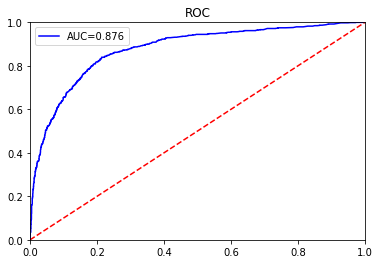

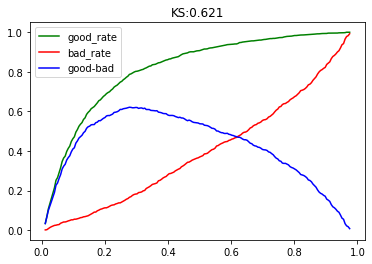

 验证集的AUC，KS: 


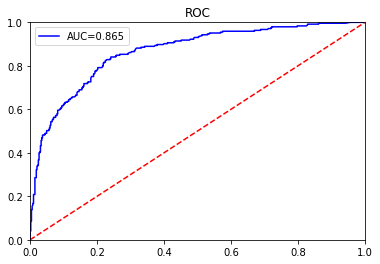

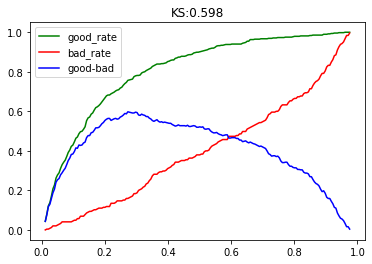

In [21]:
# LR建模
X3 = X2.loc[:,coef_select_col]
x_train,x_valid,y_train,y_valid = train_test_split(X3,y,test_size=0.2,random_state=0)
# 保存训练集和验证集的index
train_index = x_train.index.tolist()
valid_index = x_valid.index.tolist()

# show(X3,maxBytes=0, columnDefs=[{"width": "200px", "targets": "_all"}])

lr_model = LogisticRegression(C=1.0).fit(x_train,y_train)
coe_dict = {x:y for x,y in zip(x_train.columns,lr_model.coef_[0])}
print("\033[1;31m 截距：\033[0m",lr_model.intercept_[0])
print("\033[1;31m 特征系数： \033[0m",coe_dict)
print('\033[1;31m 建模完成----------------------------------------\n \033[0m')

print("\033[1;31m 训练集好坏样本数：\n \033[0m",y_train.value_counts())
print("\033[1;31m 验证集好坏样本数：\n \033[0m",y_valid.value_counts())

#绘制训练集的auc，ks
train_pre = lr_model.predict_proba(x_train)[:,1]
print('\033[1;31m 训练集的AUC，KS: \033[0m')
self_f_2.plot_roc(y_train,train_pre)
self_f_2.plot_model_ks(y_train,train_pre)

# 绘制验证集的auc，ks
valid_pre = lr_model.predict_proba(x_valid)[:,1]
print('\033[1;31m 验证集的AUC，KS: \033[0m')
self_f_2.plot_roc(y_valid,valid_pre)
self_f_2.plot_model_ks(y_valid,valid_pre)  

 时间外样本集好坏样本数 
0    1016
1     237
Name: target, dtype: int64
 时间外样本集的AUC，KS 


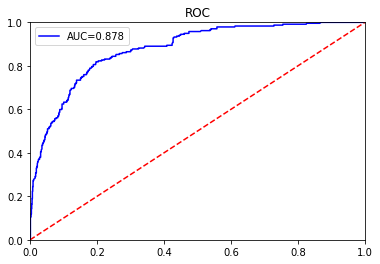

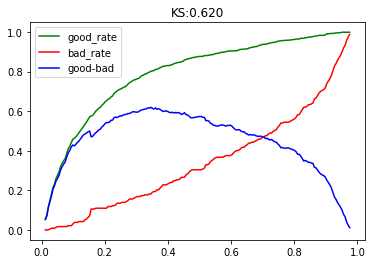

In [22]:
woe_map_df2 = woe_map_df[woe_map_df.col.isin(coef_select_col)].reset_index(drop=True)
# 绘制测试集的auc，ks
oot = oot_data.loc[:,coef_select_col+[target]].reset_index(drop=True)
oot_woe = self_f_2.var_mapping(oot,woe_map_df2,'woe',target)
x_oot = oot_woe.drop([target],axis=1)
y_oot = oot_woe[target]
oot_pre = lr_model.predict_proba(x_oot)[:,1]

print("\033[1;31m 时间外样本集好坏样本数 \033[0m")
print(y_oot.value_counts())

print('\033[1;31m 时间外样本集的AUC，KS \033[0m')
self_f_2.plot_roc(y_oot,oot_pre)
self_f_2.plot_model_ks(y_oot,oot_pre)

## 分数映射&分数分布

### 分数刻度&各入模变量相应分箱得分

In [23]:
# 评分转换
A,B,base_score = self_f_2.cal_scale(650,1,30,lr_model)
dict_score_scale={"A":A,"B":B,"base_score":base_score}
df_score_scale=pd.DataFrame(pd.Series(dict_score_scale),columns=["value"])
df_score_scale=df_score_scale.reset_index().rename(columns={'index':'type'})

print("\033[1;31m 评分卡刻度 \033[0m")
show(df_score_scale)

score_map_df  = self_f_2.get_score_map(woe_map_df2,coe_dict,B)
print("\033[1;31m 变量各分箱对应的分数 \033[0m\n")
show(score_map_df)

 评分卡刻度 


type,value


 变量各分箱对应的分数 



col,bin,IV,score,total,totalrate,bad,badrate,good,goodrate,badattr,goodattr,woe,bin_iv,bins,var_name,min_bin,max_bin,fuzhu


### 训练集&验证集&时间外样本分数转换

In [24]:
# 分数映射
#训练集
train_data = train2.iloc[train_index,:].loc[:,coef_select_col+[target]].reset_index(drop=True)
train_score = self_f_2.var_mapping(train_data,score_map_df,'score',target)
train_score['final_score'] = base_score
for col in coef_select_col:
    train_score['final_score']+=train_score[col]
train_score['final_score'] = train_score['final_score'].map(lambda x:int(x))

#验证集
valid_data = train2.iloc[valid_index,:].loc[:,coef_select_col+[target]].reset_index(drop=True)
valid_score = self_f_2.var_mapping(valid_data,score_map_df,'score',target)
valid_score['final_score'] = base_score
for col in coef_select_col:
    valid_score['final_score']+=valid_score[col]
valid_score['final_score'] = valid_score['final_score'].map(lambda x:int(x))
valid_score.to_excel("valid_score.xlsx")

oot_score = self_f_2.var_mapping(oot,score_map_df,'score',target)
oot_score['final_score'] = base_score
for col in coef_select_col:
    oot_score['final_score']+=oot_score[col]
oot_score['final_score'] = oot_score['final_score'].map(lambda x:int(x))
print('\033[1;31m 评分转换完成--------------------------------------- \033[0m')

 评分转换完成--------------------------------------- 


### 训练集&验证集&时间外样本分数分箱分布

 训练集评分分箱分布


,final_score,ks,pass_rate,total,totalrate,bad,badrate,good,goodrate,lj_bad,lj_bad_rate,lj_good,lj_good_rate,badattr,goodattr


 验证集评分分箱分布


,final_score,ks,pass_rate,total,totalrate,bad,badrate,good,goodrate,lj_bad,lj_bad_rate,lj_good,lj_good_rate,badattr,goodattr


 时间外验证集评分分箱分布


,final_score,ks,pass_rate,total,totalrate,bad,badrate,good,goodrate,lj_bad,lj_bad_rate,lj_good,lj_good_rate,badattr,goodattr


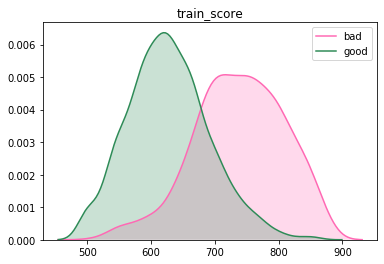

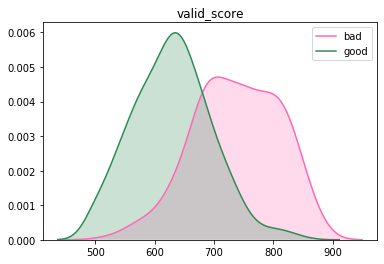

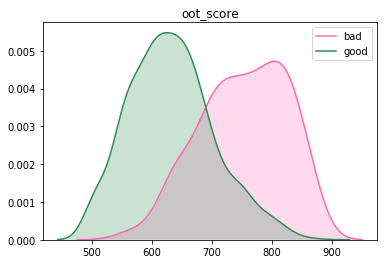

In [25]:
#分数分布，默认按照以下分位点分箱[0.1,0.2,0.3,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.8,0.9,1.0]
#训练集
print("\033[1;31m 训练集评分分箱分布\033[0m")
train_score_distribution=self_f_2.score_distribution(train_score)
show(train_score_distribution,columnDefs=[{"width": "90px", "targets": "_all"}])

#验证集
print("\033[1;31m 验证集评分分箱分布\033[0m")
valid_score_distribution=self_f_2.score_distribution(valid_score)
show(valid_score_distribution,columnDefs=[{"width": "90px", "targets": "_all"}])

#时间外验证集
print("\033[1;31m 时间外验证集评分分箱分布\033[0m")
oot_score_distribution=self_f_2.score_distribution(oot_score)
show(oot_score_distribution,columnDefs=[{"width": "90px", "targets": "_all"}])

# 训练集的评分分布
self_f_2.plot_score_hist(train_score, target, 'final_score','train_score',plt_size=(6,4))
# 验证集的评分分布
self_f_2.plot_score_hist(valid_score, target, 'final_score','valid_score',plt_size=(6,4))
# 测试集的评分分布
self_f_2.plot_score_hist(oot_score, target, 'final_score','oot_score',plt_size=(6,4))